In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [41]:
# Load dataset
df = pd.read_csv(r"C:\Users\SAI RAM\Downloads\customer churn.zip")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditSc

In [42]:
df.fillna(df.median(numeric_only=True), inplace=True)
non_zero_mean = df['Balance'][df['Balance'] != 0].mean()
df['Balance'] = df['Balance'].apply(lambda x: non_zero_mean if x == 0 else x)
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [43]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [44]:
correlation_matrix = df.corr()
print("\nCorrelation with 'Exited':\n", correlation_matrix['Exited'].sort_values(ascending=False))


Correlation with 'Exited':
 Exited             1.000000
Age                0.285323
Geography          0.035943
Balance            0.014595
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [45]:
x = df.drop(columns=['Exited'])
y = df['Exited']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [46]:
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc) * 100, "%")

Random Forest Accuracy: 86.4 %


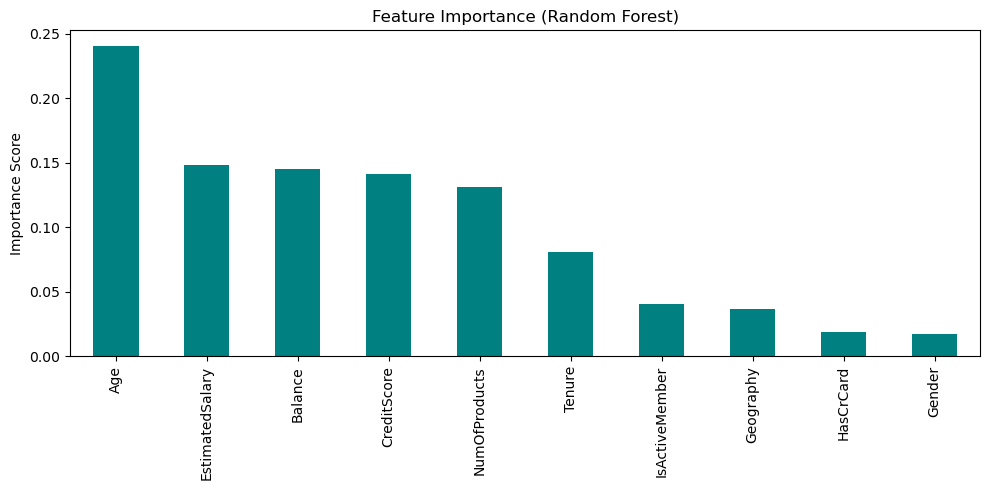

In [47]:
feature_importance = pd.Series(model_rfc.feature_importances_, index=df.drop(columns=['Exited']).columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='teal', title="Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [48]:
model_logr = LogisticRegression(max_iter=1000)
model_logr.fit(x_train, y_train)
y_pred_logr = model_logr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logr) * 100, "%")

Logistic Regression Accuracy: 81.0 %


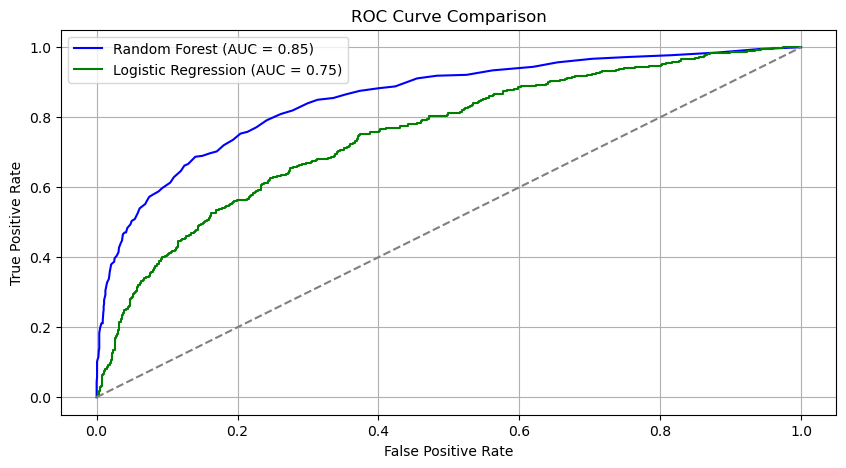

In [49]:
y_prob_rfc = model_rfc.predict_proba(x_test)[:, 1]
y_prob_logr = model_logr.predict_proba(x_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
fpr_logr, tpr_logr, _ = roc_curve(y_test, y_prob_logr)

# Plot ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rfc)), color='blue')
plt.plot(fpr_logr, tpr_logr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_logr)), color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()